In [1]:
from solardatatools import *
from solardatatools.utilities import local_median_regression_with_seasonal, basic_outlier_filter
from solardatatools.clear_day_detection import filter_for_sparsity

In [2]:
df1 = get_pvdaq_data(sysid=1199, year=[2015, 2016, 2017], api_key='opPEu3NdlUQkTz4GFMdhwkZBfpDcfY8xBJnAluCp')

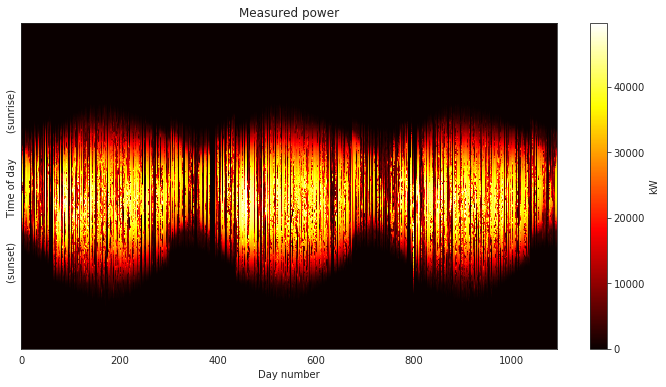

In [3]:
D = make_2d(df1, key='ac_power')
_ = plot_2d(D)

In [7]:
daily_sparsity = np.sum(D > 0.005 * np.max(D), axis=0)

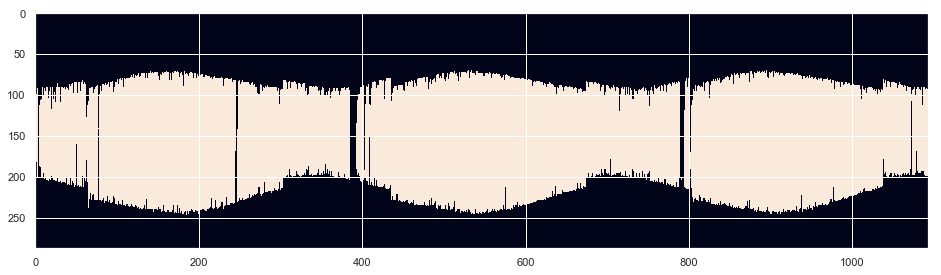

In [9]:
plt.figure(figsize=(16,16))
plt.imshow(D > 0.005 * np.max(D));

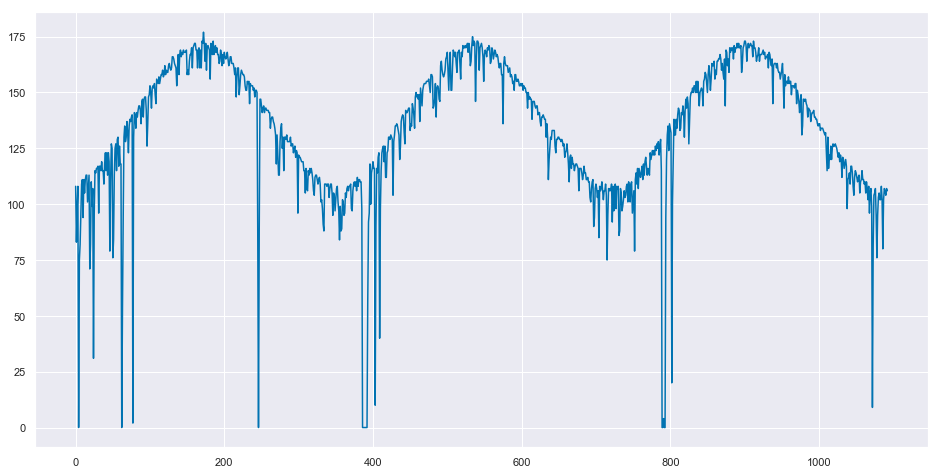

In [15]:
plt.figure(figsize=(16,8))
plt.plot(daily_sparsity)

In [12]:
filtered_signal = local_median_regression_with_seasonal(daily_sparsity, c1=1e3, solver='ECOS')

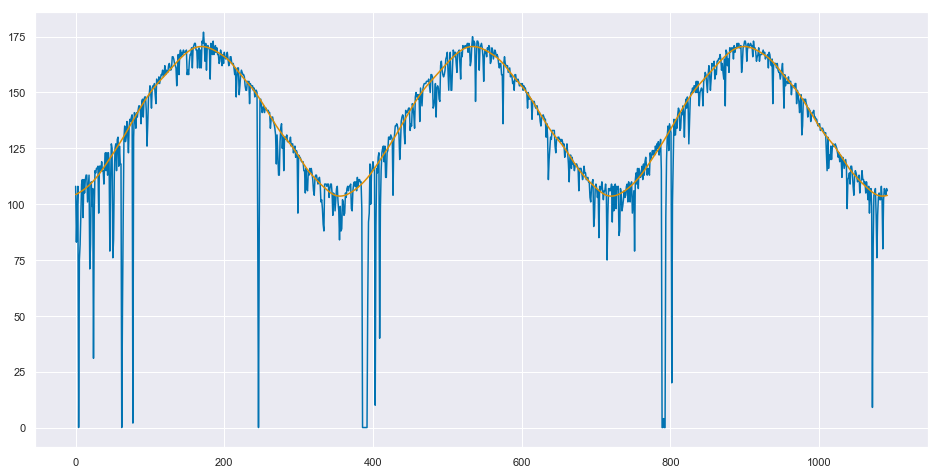

In [14]:
plt.figure(figsize=(16,8))
plt.plot(daily_sparsity)
plt.plot(filtered_signal)

In [21]:
detrended = daily_sparsity - filtered_signal


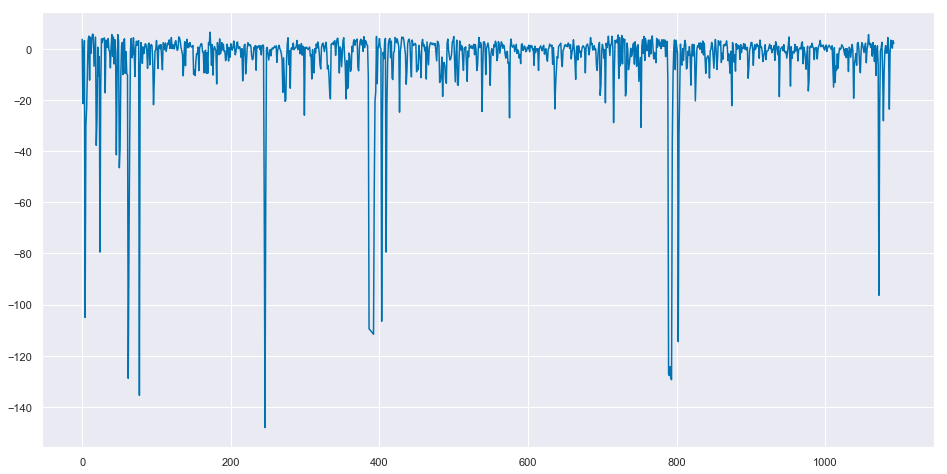

In [22]:
plt.figure(figsize=(16,8))
plt.plot(detrended)

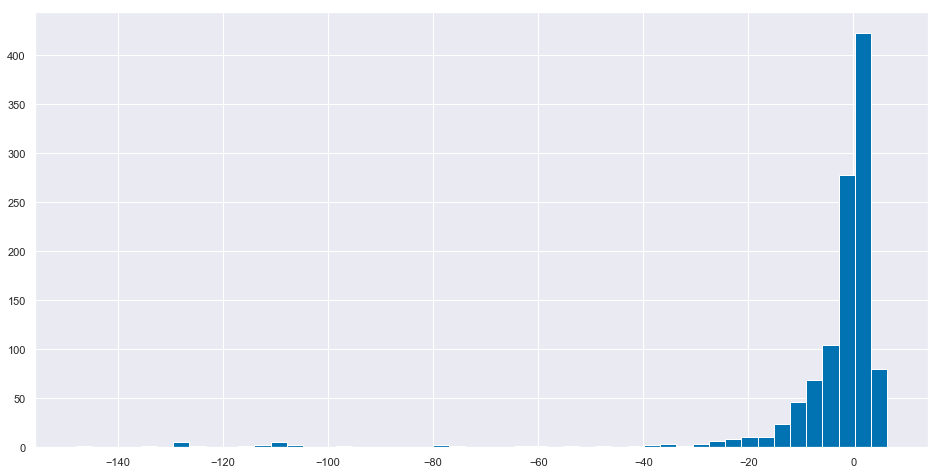

In [23]:
plt.figure(figsize=(16,8))
plt.hist(detrended, bins=50);

In [28]:
mask = basic_outlier_filter(detrended, outlier_constant=5)

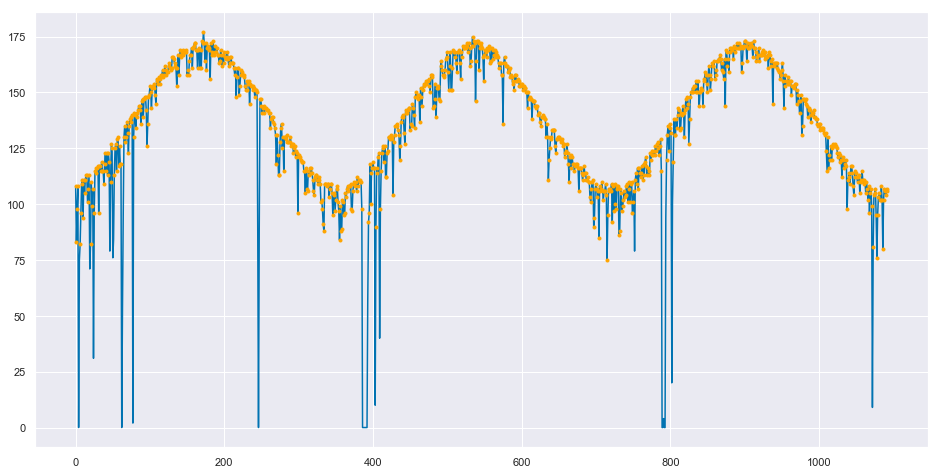

In [29]:
plt.figure(figsize=(16,8))
ixs = np.arange(len(daily_sparsity))
plt.plot(daily_sparsity)
plt.plot(ixs[mask], daily_sparsity[mask], color='orange', marker='.', ls='none')

<IPython.core.display.Javascript object>


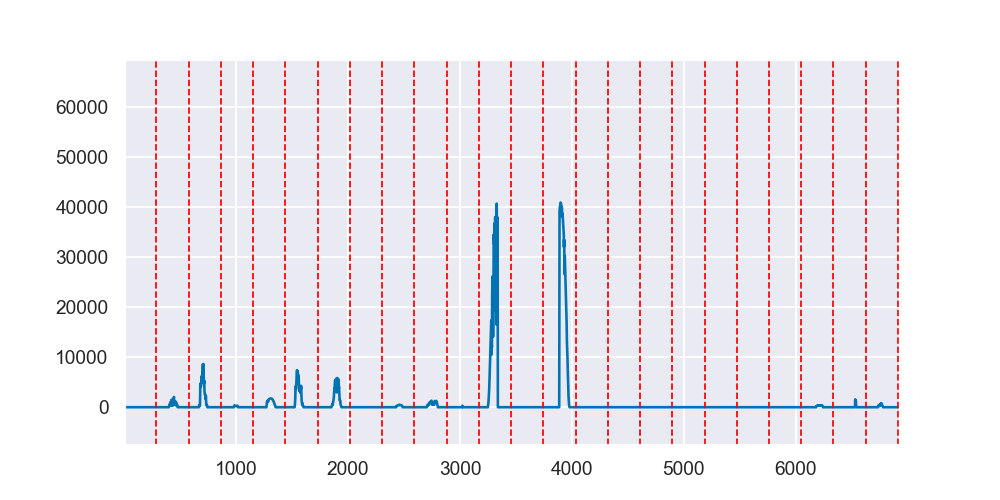

In [34]:
%matplotlib notebook
plt.figure(figsize=(8,4))
plt.plot(D[:, ~mask].ravel(order='F'))
day_markers = np.arange(0, len(D[:, ~mask].ravel(order='F')), 288)
for dm in day_markers:
    plt.axvline(dm, color='red', ls='--', linewidth=1)

In [36]:
%matplotlib inline

In [5]:
mask_auto = filter_for_sparsity(D, solver='MOSEK')

In [8]:
D_tilde = D[:, mask_auto]

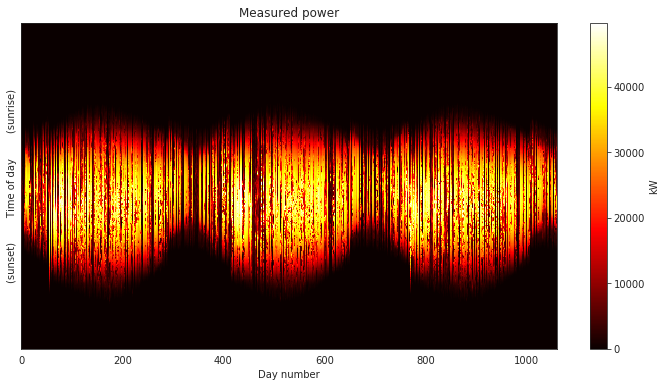

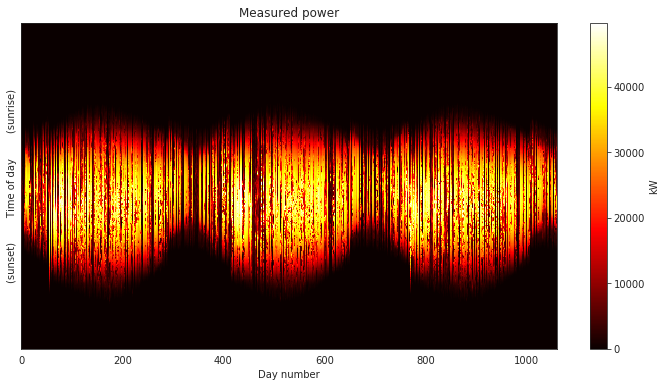

In [9]:
plot_2d(D_tilde)

In [12]:
len(D[0])

1093

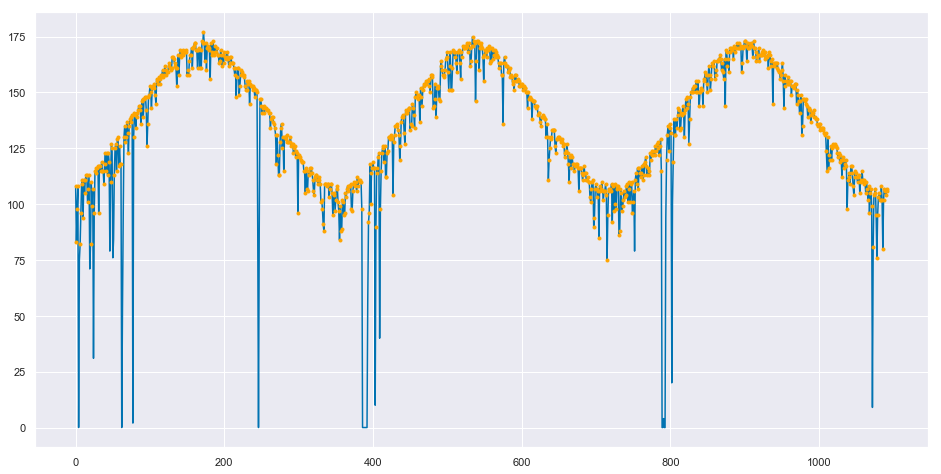

In [53]:
plt.figure(figsize=(16,8))
ixs = np.arange(len(daily_sparsity))
plt.plot(daily_sparsity)
plt.plot(ixs[mask], daily_sparsity[mask], color='orange', marker='.', ls='none')